<a href="https://colab.research.google.com/github/HarnoorOberai/Image-Classification/blob/master/HarnoorSinghOberai__190753898__VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyyaml h5py 

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models, Sequential, layers, optimizers
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

import os
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.utils import np_utils

print(tf.__version__)
print(keras.__version__)



2.2.0-rc3
2.3.0-tf


Using TensorFlow backend.


In [0]:
chosen_dataset = "mnist"
if chosen_dataset is "mnist":
  dataset_shape = (28,28,1)
  number_classes = 10

In [4]:
D_model = Sequential()

D_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=dataset_shape))
D_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.Conv2D(512,(3,3),padding='same',activation='relu'))
D_model.add(layers.MaxPool2D((2,2),strides=(2,2),padding='same'))

D_model.add(layers.Flatten())
D_model.add(layers.Dense(4096,activation='relu'))
D_model.add(layers.Dense(4096,activation='relu'))

D_model.add(layers.Dense(10,activation='softmax'))

D_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

In [5]:
mnist = tf.keras.datasets.mnist #load mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data() # by using this command you load the data
x_train, x_test = x_train / 255.0, x_test / 255.0 # change every value from 0 - 255 to 0 - 1, you don't modify labels because they are from 0 -9 (digits) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



11493376/11490434 [==============================] - 0s 0us/step


Train Set Size = 60000 images
Test Set Size = 10000 images


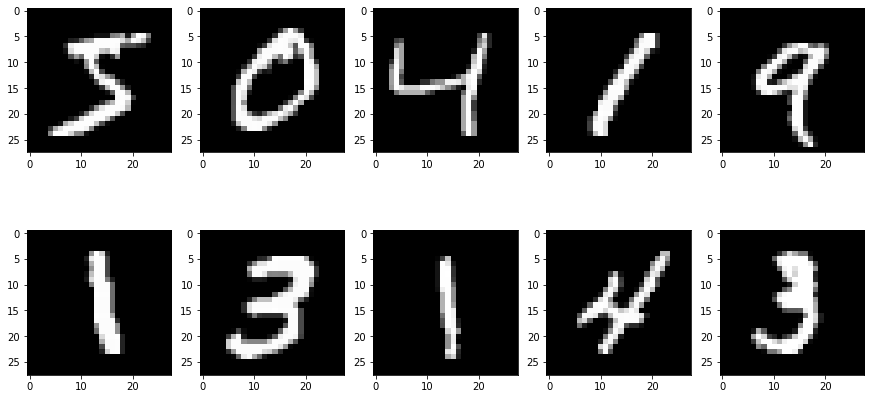

Labels : [5 0 4 1 9]
Labels : [1 3 1 4 3]


In [6]:
print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))


In [7]:
print(x_train.shape)
print(x_train.shape[0])

(60000, 28, 28)
60000


In [0]:
# single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


y_train_onehot = to_categorical(y_train, num_classes=None, dtype='float32')
y_test_onehot = to_categorical(y_test, num_classes=None, dtype='float32')

In [9]:
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
D_model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [11]:
results = D_model.fit(
    x_train,y_train_onehot,batch_size=128,epochs=50,validation_data=(x_test,y_test_onehot),
    verbose=1,shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 453us/step - loss: 0.1128 - accuracy: 0.9604 - val_loss: 0.0159 - val_accuracy: 0.9953
Epoch 2/50
60000/60000 [==============================] - 20s 332us/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0143 - val_accuracy: 0.9959
Epoch 3/50
60000/60000 [==============================] - 20s 332us/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0094 - val_accuracy: 0.9977
Epoch 4/50
60000/60000 [==============================] - 20s 333us/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0123 - val_accuracy: 0.9966
Epoch 5/50
60000/60000 [==============================] - 20s 331us/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0057 - val_accuracy: 0.9984
Epoch 6/50
60000/60000 [==============================] - 20s 332us/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0070 - val_accuracy: 0.9983
Epoch 7/50
60000/60000 [==============================] 

In [0]:
D_model.save('VGG16_mnist.h5')

In [0]:
new_model = tf.keras.models.load_model('VGG16_mnist.h5')

In [0]:
predictions = new_model.predict(x_test)

7


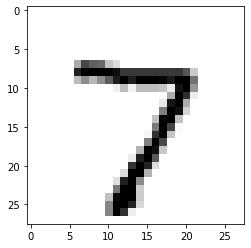

In [17]:
print(np.argmax(predictions[0]))

plt.imshow(x_test[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
# x_test[0].reshape(28,28)
# plt.show()

In [16]:

print(tf.__version__)
print(keras.__version__)
import sys
print(sys.version)

2.2.0-rc3
2.3.0-tf
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
